In [115]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


mypathE_N                  = "/home/oline/Documents/GRAPPA/ExtremeAstrophysics/Project/git/StellarDynamics/ODESolvedNewtonian.txt"
mypathE_PN                  = "/home/oline/Documents/GRAPPA/ExtremeAstrophysics/Project/git/StellarDynamics/ODESolvedPostNewtonian.txt"

# Import Data

In [116]:
time_ = np.loadtxt('S2.txt',usecols=(0))
x_data_s2 = np.loadtxt('S2.txt',usecols=(1))
y_data_s2 = np.loadtxt('S2.txt',usecols=(2))
x_data_err_s2 = np.loadtxt('S2.txt',usecols=(3))
y_data_err_s2 = np.loadtxt('S2.txt',usecols=(4))

# Find Initial Conditions

In [170]:
#Setting orbital parameter values
e_s2 = 0.872
a_s2 = 0.121
dist = 1.689*10**9 #AU
arc2rad = 4.85*10**(-6)

G = 4*np.pi**2
M = 4.15*10**6
mu = G*M

Omega_s2 = 231.9*np.pi/180. #Converting to radian
omega_s2 = 68.9*np.pi/180. #Converting to radian
i_s2 = 138.1*np.pi/180. #Converting to radian


# Set up orbit
rad = np.arange(0, (2 * np.pi), 0.01)
r_s2 = a_s2*(1-e_s2**2)/(1+e_s2*np.cos(rad))
x_s2 = r_s2*np.cos(rad)
y_s2 = r_s2*np.sin(rad)

#In sky plane
rad_sky_s2 = Omega_s2 + np.arctan(np.tan(rad+omega_s2)*np.cos(i_s2))
rho_s2 = r_s2*np.cos(rad+omega_s2)/(np.cos(rad_sky_s2-Omega_s2))

#Writing in terms of x,y
x_sky_s2 = rho_s2*np.cos(rad_sky_s2)
y_sky_s2 = rho_s2*np.sin(rad_sky_s2)

# Set up inverted system
def calc(DEC_, RA_):
    rad_sky_ = np.arctan2(DEC_,RA_)
    rad = np.arctan2(np.tan(rad_sky_-Omega_s2),np.cos(i_s2))-omega_s2
    r_true = np.sqrt(DEC_**2 + RA_**2)*np.cos(rad_sky_-Omega_s2)/np.cos(rad+omega_s2)
    x_s2 = r_true*np.cos(rad)*dist*arc2rad
    y_s2 = r_true*np.sin(rad)*dist*arc2rad
    
    return x_s2, y_s2


v_per = np.sqrt((1-e_s2)*mu/((1+e_s2)*a_s2*arc2rad*dist))
print('initial velocity perihelion = ', np.round(v_per, 3))

RA = x_data_s2[27]
DEC = y_data_s2[27]
t1 = time_[27]
RA2 = x_data_s2[28]
DEC2 = y_data_s2[28]
t2 = time_[28]
delta_t = t2-t1

au_x1, au_y1 = calc(RA, DEC)
au_x2, au_y2 = calc(RA2, DEC2)

vx = (au_x1-au_x2)/delta_t
vy = (au_y1-au_y2)/delta_t

tot = np.sqrt((au_x2-au_x1)**2+ (au_y2-au_y1)**2)
print('initial x position = ', au_x1)
print('initial y position = ', au_y1)
cosTheta = (au_x2-au_x1)/tot
sinTheta = (au_y2-au_y1)/tot
print('cos(theta) for velocity direction in y = ', cosTheta)
print('sin(theta) for velocity direction in x = ', sinTheta)
test = np.sqrt(0.87**2+0.49**2)
print('test = ', test)

x_observed_true = []
y_observed_true = []
for i in range(len(x_data_s2)):
    x_temp, y_temp = calc(x_data_s2[i], y_data_s2[i])
    x_observed_true.append(x_temp)
    y_observed_true.append(y_temp)

initial velocity perihelion =  106.311
initial x position =  -1901.4645023620326
initial y position =  -9.109959942678186
cos(theta) for velocity direction in y =  0.8698524492141125
sin(theta) for velocity direction in x =  0.49331198707938323
test =  0.9984988733093293


In [171]:
def read_files(path):  
    
    x, y, z = [],[],[]
    vx, vy, vz = [],[],[]
    t = []
    
    
    with open(path, 'r') as infile:
        lines = infile.readlines()[2:]
        for line in lines:

            line = line.split()
            t.append(float(line[0]))
            x.append(float(line[1]))
            y.append(float(line[2]))
            z.append(float(line[3]))
            vx.append(float(line[4]))
            vy.append(float(line[5]))
            vz.append(float(line[6]))
    
    r = np.zeros((len(x), 3))
    v = np.zeros((len(x), 3))
    for i in range(len(x)):
        r[i] = [x[i], y[i], z[i]]
        v[i] = [vx[i], vy[i], vz[i]]
        
    return np.array(x), np.array(y),np.array(z), t, r, v

x,y,z,tE,rE, vE = read_files(mypathE_N)
x_PN,y_PN,z_PN,tE_PN,rE_PN, vE_PN = read_files(mypathE_PN)
n_itt = len(rE)

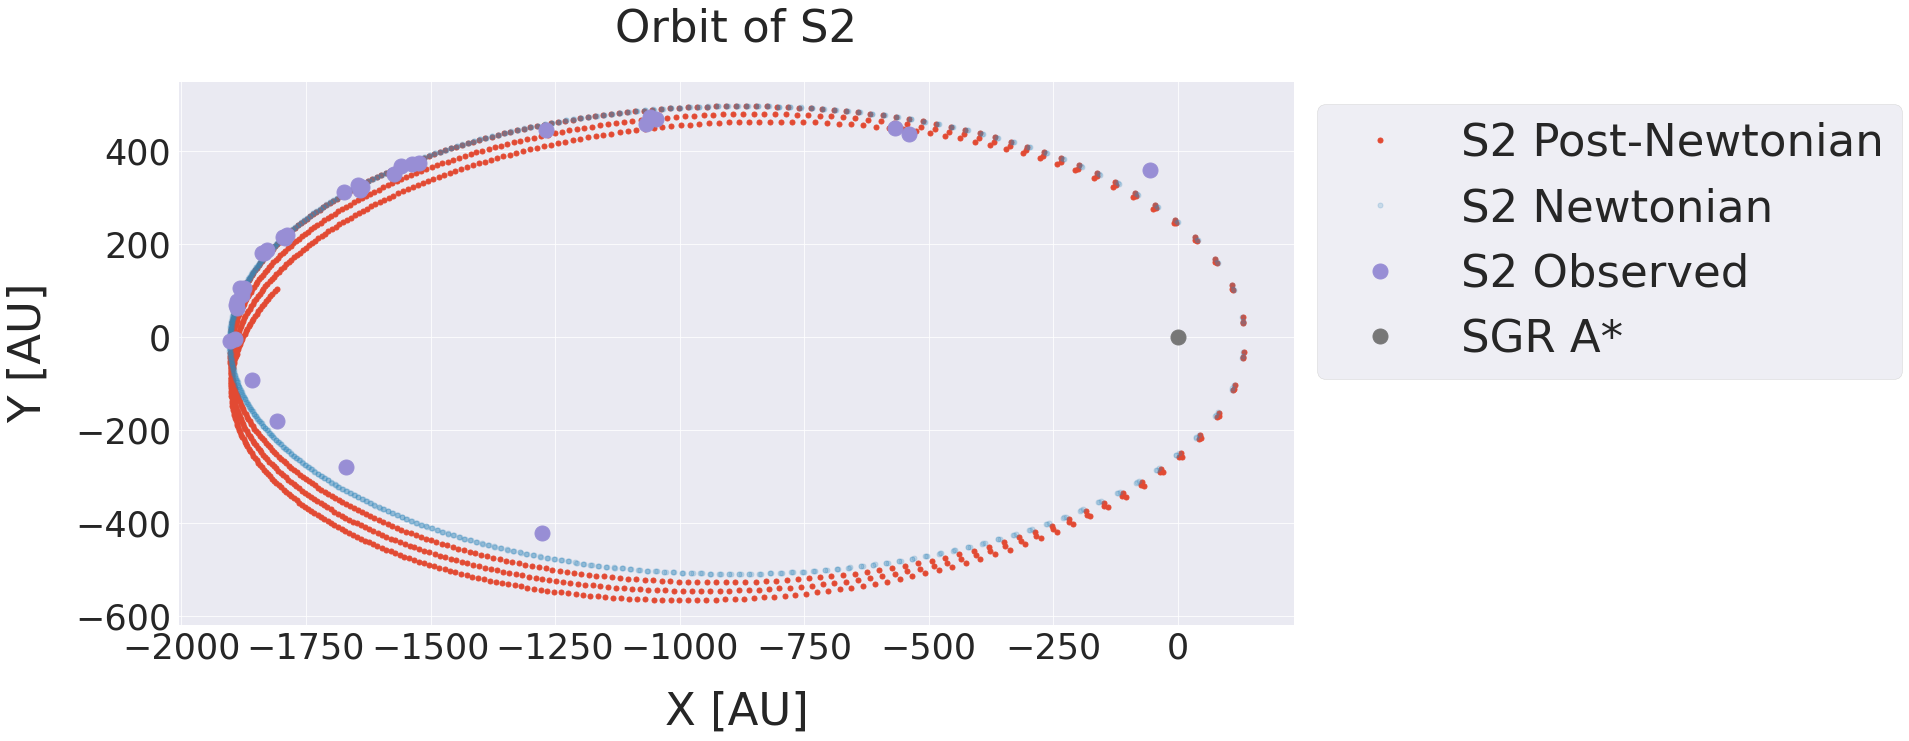

In [172]:
plt.figure(figsize = (20,10))
fsize = 45


plt.plot(x_PN,y_PN, '.', ms = 10, label = 'S2 Post-Newtonian')
plt.plot(x,y, '.', ms = 10, label = 'S2 Newtonian', alpha = 0.2)
plt.plot(x_observed_true, y_observed_true, 'o', ms = 15, label = 'S2 Observed')
plt.plot([0],[0], '.', ms = 30, label = 'SGR A*')

plt.ylabel('Y [AU]', fontsize = fsize, labelpad = 25)
plt.xlabel('X [AU]', fontsize = fsize,  labelpad = 25)
plt.xticks(size = fsize-10)
plt.yticks(size = fsize-10)

plt.title('Orbit of S2', pad = 40, fontsize = fsize)
#plt.yticks([-1,-0.5,0,0.5,1])

plt.legend(fontsize = fsize, bbox_to_anchor=(1,1),loc = 'upper left')
#plt.xlim([-2000,2000])
#plt.ylim([-2000,2000])
#plt.savefig('../Paper/Figures/EC.png')

In [175]:
def true_orbit_to_sky_orbit(x_, y_):
    rad = np.arctan2(y_,x_)
    r_s2 = a_s2*(1-e_s2**2)/(1+e_s2*np.cos(rad))

    #In sky plane
    rad_sky_s2 = Omega_s2 + np.arctan(np.tan(rad+omega_s2)*np.cos(i_s2))
    rho_s2 = r_s2*np.cos(rad+omega_s2)/(np.cos(rad_sky_s2-Omega_s2))
    x_sky_s2 = rho_s2*np.cos(rad_sky_s2)
    y_sky_s2 = rho_s2*np.sin(rad_sky_s2)
    return x_sky_s2, y_sky_s2

x_sky_N, y_sky_N = [],[]
for i in range(len(x)):
    x_temp, y_temp = true_orbit_to_sky_orbit(x[i], y[i])
    x_sky_N.append(x_temp)
    y_sky_N.append(y_temp)
    
    
x_sky_PN, y_sky_PN = [],[]
for i in range(len(x)):
    x_temp, y_temp = true_orbit_to_sky_orbit(x_PN[i], y_PN[i])
    x_sky_PN.append(x_temp)
    y_sky_PN.append(y_temp)

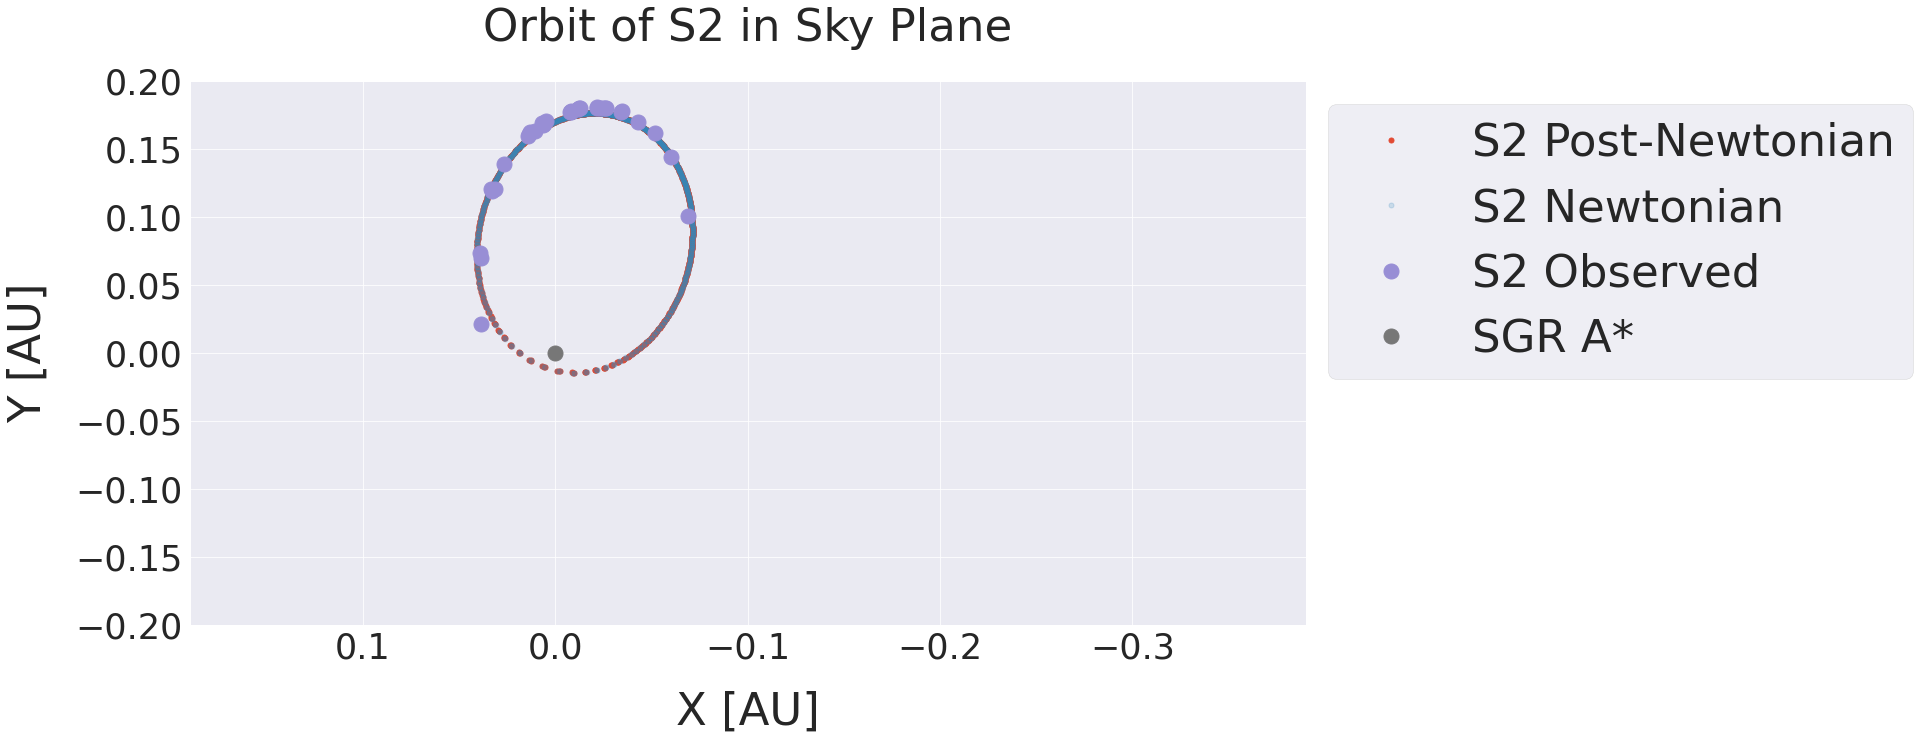

In [177]:
plt.figure(figsize = (20,10))
fsize = 45


plt.plot(y_sky_PN,x_sky_PN, '.', ms = 10, label = 'S2 Post-Newtonian')
plt.plot(y_sky_N,x_sky_N, '.', ms = 10, label = 'S2 Newtonian', alpha = 0.2)
plt.plot(x_data_s2, y_data_s2, 'o', ms = 15, label = 'S2 Observed')
plt.plot([0],[0], '.', ms = 30, label = 'SGR A*')

plt.ylabel('Y [AU]', fontsize = fsize, labelpad = 25)
plt.xlabel('X [AU]', fontsize = fsize,  labelpad = 25)
plt.xticks(size = fsize-10)
plt.yticks(size = fsize-10)

plt.title('Orbit of S2 in Sky Plane', pad = 40, fontsize = fsize)

plt.xlim([0.19,-0.39])
plt.ylim([-0.2,0.2])
plt.legend(fontsize = fsize, bbox_to_anchor=(1,1),loc = 'upper left')